### Data Cleaning

In [1]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import combat
#from combat import combat
#import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [3]:
#Creating a dataframe from txt file

df = pd.read_csv('matrix_standard_a3zyc4.txt', delimiter = "\t", header = 0)

df = df.iloc[:,:12]
pd.set_option('display.max_rows', 2500)
df

,Class,Lipid,Occurence,m/z,RTmin,RTmax,01pcDNA,02pcDNA,03pcDNA,04Creb3L1ACAoverex,05Creb3L1ACAoverex,06Creb3L1ACAoverex
0,GL02_DAG,2010003_34:0,NH4 1,614.57178,0.69,0.73,9.606318e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,GL02_DAG,2010004_34:1,NH4 1,612.55615,0.72,0.73,6.375472e+06,0.000000e+00,5.112208e+06,2.347739e+06,4.847248e+06,0.000000e+00
2,GL02_DAG,2010008_38:0,NH4 1,670.63440,0.71,0.73,4.845203e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,GL02_DAG,2010010_32:1,NH4 1,584.52484,0.72,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.361093e+06
4,GL02_DAG,2010011_32:2,NH4 1,582.50922,0.72,0.73,0.000000e+00,2.699994e+06,0.000000e+00,1.423795e+06,0.000000e+00,0.000000e+00
5,GL02_DAG,2010012_33:0,NH4 1,600.55615,0.71,0.73,0.000000e+00,5.861224e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,GL02_DAG,2010013_33:1,NH4 1,598.54047,0.72,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,GL02_DAG,2010016_33:2,NH4 1,596.52484,0.72,0.73,3.134348e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.797591e+06,2.475492e+06
8,GL02_DAG,2010019_33:3,NH4 1,594.50922,0.71,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,GL02_DAG,2010021_34:2,NH4 1,610.54047,0.72,0.73,5.118185e+06,4.654961e+06,4.195879e+06,0.000000e+00,2.445170e+06,3.032505e+06


In [4]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for row in df['Class']:
    row = row.split('_')
    if row[1] == 'PxCer':
        Class2.append('SM')
    else:
        Class2.append(row[1])
    
df.insert(0, 'Class2', Class2)

Lipid2 = []
for row in df['Lipid']:
    row = row.split('_')
    if row[0] == '1deoxyCer':
        Lipid2.append(f'1deoxyCer({row[1]})')
    elif row[0].startswith('EX'):
        Lipid2.append(f'EX({row[1]})')
    else:
        Lipid2.append(f'({row[1]})')
    
df.insert(2, 'Lipid2', Lipid2)

<AxesSubplot:>

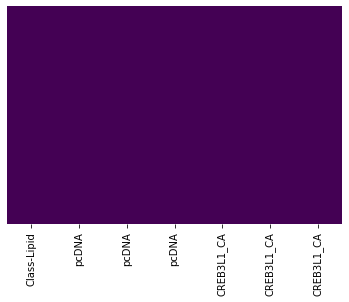

In [5]:
#Elimination of unnecesary columns
df['Class-Lipid'] = df['Class2'] + df['Lipid2']
first_col = df.pop('Class-Lipid')
df.insert(0, 'Class-Lipid', first_col)
df = df.drop(['Occurence','m/z','RTmin','RTmax', 'Class', 'Lipid', 'Class2', 'Lipid2'], axis = 1)
#Rename Columns
df = df.rename(columns = {'01pcDNA': 'pcDNA', '02pcDNA': 'pcDNA', '03pcDNA': 'pcDNA',
                          '04Creb3L1ACAoverex': 'CREB3L1_CA', '05Creb3L1ACAoverex': 'CREB3L1_CA', '06Creb3L1ACAoverex': 'CREB3L1_CA'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

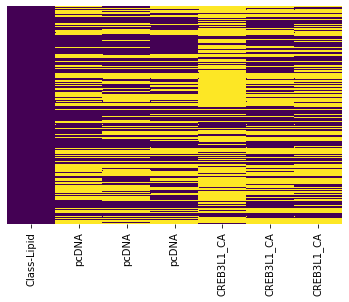

In [6]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

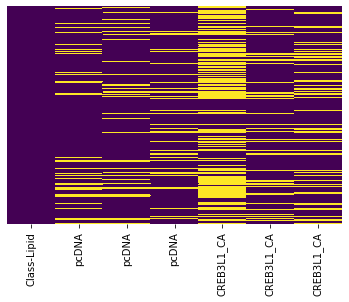

In [7]:
# dropping the NaNs, treshols 3 means that those rows with at least 3 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=3, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [8]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t = df_t.convert_dtypes()
df_t

,index,0,1,2,3,4,5,6,7,8,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540
0,Class-Lipid,DAG(34:1),DAG(32:2),DAG(33:2),DAG(34:2),DAG(35:1),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),...,HexCer(38:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(36:0),HexCer(36:0),HexCer(34:1)
1,pcDNA,6375471.875,NaN,3134347.890625,5118185.25,NaN,2481145.734375,4901358.6875,3272995.03125,2390757.21875,...,1150819.460938,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,464068.360352,1096604.544922,NaN
2,pcDNA,NaN,2699994.0,NaN,4654960.8125,NaN,2573727.625,NaN,3394526.6875,1958704.378906,...,NaN,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,3050190.59375,NaN,NaN
3,pcDNA,5112208.25,NaN,NaN,4195878.5625,NaN,1761541.992188,4192781.875,NaN,1911641.128906,...,406875.871094,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,NaN,585009.99707,324505.839844
4,CREB3L1_CA,2347739.144531,1423794.828125,NaN,NaN,1751452.483398,1227126.8125,1644034.523438,NaN,1214368.782227,...,NaN,NaN,NaN,7533577.671875,2245625.699219,20877884.796875,14120758.390625,3111990.796875,NaN,NaN
5,CREB3L1_CA,4847248.5,NaN,1797590.984375,2445169.71875,2011625.363281,1880423.539062,3745369.90625,1343966.109375,NaN,...,NaN,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,NaN,NaN,279193.708984
6,CREB3L1_CA,NaN,NaN,2475491.609375,3032505.1875,2445076.242188,2021349.710938,3772067.5625,NaN,2072840.605469,...,518017.839844,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,NaN,NaN,NaN


<AxesSubplot:>

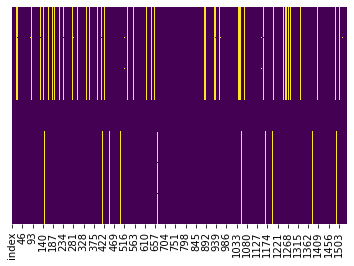

In [9]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

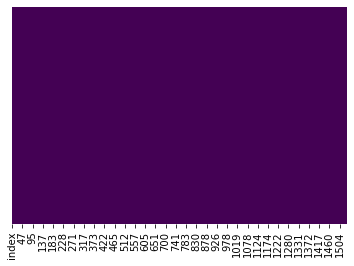

In [10]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [11]:
df_t

,index,0,1,2,3,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,1536,1537,1538,1540
0,CREB3L1_CA,2347739.144531,1423794.828125,2136541.296875,2738837.453125,1227126.8125,1644034.523438,1343966.109375,1214368.782227,274575.90625,...,405679.892578,518017.839844,474222.677979,490732.9375,7533577.671875,2245625.699219,20877884.796875,14120758.390625,3111990.796875,279193.708984
1,CREB3L1_CA,4847248.5,1423794.828125,1797590.984375,2445169.71875,1880423.539062,3745369.90625,1343966.109375,1643604.693848,274575.90625,...,348550.621094,518017.839844,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,3111990.796875,279193.708984
2,CREB3L1_CA,3597493.822266,1423794.828125,2475491.609375,3032505.1875,2021349.710938,3772067.5625,1343966.109375,2072840.605469,274575.90625,...,462809.164062,518017.839844,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,3111990.796875,279193.708984
3,Class-Lipid,DAG(34:1),DAG(32:2),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),...,HexCer(41:0),HexCer(38:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(36:0),HexCer(34:1)
4,pcDNA,6375471.875,2699994.0,3134347.890625,5118185.25,2481145.734375,4901358.6875,3272995.03125,2390757.21875,1025467.015625,...,279106.168945,1150819.460938,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,464068.360352,324505.839844
5,pcDNA,5743840.0625,2699994.0,3134347.890625,4654960.8125,2573727.625,4547070.28125,3394526.6875,1958704.378906,1520593.835938,...,296724.526367,778847.666016,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,3050190.59375,324505.839844
6,pcDNA,5112208.25,2699994.0,3134347.890625,4195878.5625,1761541.992188,4192781.875,3333760.859375,1911641.128906,1273030.425781,...,261487.811523,406875.871094,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,1757129.477051,324505.839844


In [12]:
df_t = df_t.rename(columns=df_t.iloc[3])
df_t.drop(3,0,inplace=True)
df_t

,Class-Lipid,DAG(34:1),DAG(32:2),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),...,HexCer(41:0),HexCer(38:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(36:0),HexCer(34:1)
0,CREB3L1_CA,2347739.144531,1423794.828125,2136541.296875,2738837.453125,1227126.8125,1644034.523438,1343966.109375,1214368.782227,274575.90625,...,405679.892578,518017.839844,474222.677979,490732.9375,7533577.671875,2245625.699219,20877884.796875,14120758.390625,3111990.796875,279193.708984
1,CREB3L1_CA,4847248.5,1423794.828125,1797590.984375,2445169.71875,1880423.539062,3745369.90625,1343966.109375,1643604.693848,274575.90625,...,348550.621094,518017.839844,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,3111990.796875,279193.708984
2,CREB3L1_CA,3597493.822266,1423794.828125,2475491.609375,3032505.1875,2021349.710938,3772067.5625,1343966.109375,2072840.605469,274575.90625,...,462809.164062,518017.839844,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,3111990.796875,279193.708984
4,pcDNA,6375471.875,2699994.0,3134347.890625,5118185.25,2481145.734375,4901358.6875,3272995.03125,2390757.21875,1025467.015625,...,279106.168945,1150819.460938,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,464068.360352,324505.839844
5,pcDNA,5743840.0625,2699994.0,3134347.890625,4654960.8125,2573727.625,4547070.28125,3394526.6875,1958704.378906,1520593.835938,...,296724.526367,778847.666016,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,3050190.59375,324505.839844
6,pcDNA,5112208.25,2699994.0,3134347.890625,4195878.5625,1761541.992188,4192781.875,3333760.859375,1911641.128906,1273030.425781,...,261487.811523,406875.871094,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,1757129.477051,324505.839844


In [13]:
df_t.iloc[:,1:] = df_t.iloc[:,1:].div(df_t.iloc[:,1:]['PCEX(34:1)'], axis=0)
df_t = df_t.drop(['PCEX(34:1)'], axis = 1)

## Volcano Plot

In [14]:
#creating new df with mean, std and n.obs
df4 = df_t.set_index(['Class-Lipid']).T.astype('float64').copy()
df_pvalue = pd.DataFrame()
df_pvalue['CREB3L1_CA_mean'] = df4.groupby(axis = 1, level = 0).mean()['CREB3L1_CA']
df_pvalue['CREB3L1_CA_std'] = df4.groupby(axis = 1, level = 0).std()['CREB3L1_CA']
df_pvalue['CREB3L1_CA_n'] = 3
df_pvalue['pcDNA_mean'] = df4.groupby(axis = 1, level = 0).mean()['pcDNA']
df_pvalue['pcDNA_std'] = df4.groupby(axis = 1, level = 0).std()['pcDNA']
df_pvalue['pcDNA_n'] = 3

#pvalue function
df_pvalue['pvalue'] = df_pvalue.apply(lambda x: stats.ttest_ind_from_stats(x['CREB3L1_CA_mean'],x['CREB3L1_CA_std'],x['CREB3L1_CA_n'], 
                                                     x['pcDNA_mean'],x['pcDNA_std'],x['pcDNA_n'])[1],axis=1)
# convert pvalue to minus log10
df_pvalue['pvalue'] = df_pvalue['pvalue'].transform(lambda x: -np.log10(x))
df_pvalue = df_pvalue.rename(columns = {'pvalue': 'minuslog10_pvalue'}, inplace = False)

#fold change
df_pvalue['fold_change'] = df_pvalue['CREB3L1_CA_mean'].div(df_pvalue['pcDNA_mean'], axis = 0)

# convert fold change to log2
df_pvalue['fold_change'] = df_pvalue['fold_change'].transform(lambda x: np.log2(x))
df_pvalue = df_pvalue.rename(columns = {'fold_change': 'log2_fold_change'}, inplace = False)

# save to csv
df_pvalue.to_csv('creb3l1_fc_pvalue.csv')

In [15]:
df_pvalue

,CREB3L1_CA_mean,CREB3L1_CA_std,CREB3L1_CA_n,pcDNA_mean,pcDNA_std,pcDNA_n,minuslog10_pvalue,log2_fold_change
DAG(34:1),0.001436,0.000673,3,0.002462,0.000240,3,1.170000,-0.777861
DAG(32:2),0.000555,0.000073,3,0.001174,0.000233,3,1.928019,-1.082010
DAG(33:2),0.000822,0.000048,3,0.001363,0.000271,3,1.568177,-0.730412
DAG(34:2),0.001058,0.000049,3,0.001998,0.000214,3,2.756614,-0.918150
DAG(35:2),0.000669,0.000201,3,0.000969,0.000159,3,0.947518,-0.534209
DAG(36:1),0.001206,0.000551,3,0.001957,0.000247,3,1.012341,-0.698965
DAG(36:3),0.000524,0.000069,3,0.001452,0.000302,3,2.184374,-1.471544
DAG(37:1),0.000638,0.000168,3,0.000893,0.000083,3,1.107590,-0.484233
DAG(36:4),0.000107,0.000014,3,0.000562,0.000183,3,1.899523,-2.393978
DAG(37:2),0.000786,0.000048,3,0.000983,0.000070,3,1.804843,-0.322659


In [16]:
# Creation of the volcano class to generate the plot.... this could be in a separate file

class Volcano(object):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot')
    
    def __init__(self, ratio, p_val, label=None, s_curve_x_axis_overplot=0.5, s_curve_y_axis_overplot=0.5):
        """
        careful use ratio not difference as in Perseus 
        ratio of 0.5 instead of difference -2
        :param ratio: Pandas.Series or Numpy.Array or List of log2(ratios)
        :param p_val: Pandas.Series or Numpy.Array or List of -log10(p-values) 
        :param label: Pandas.Series or Numpy.Array or ListOfString
        """
        assert len(ratio) == len(p_val)
        self.df = pd.DataFrame({"ratio": ratio, "p_val": p_val})
        if label is not None:
            self.df["label"] = label
        self.s_curve_y_axis_overplot = s_curve_y_axis_overplot
        self.p_val_cutoff = self.get_p_val_cutoff()
        self.ratio_cutoff = self.get_ratio_cutoff()
        self.df["s_val"] = self.df.apply(self.calc_s_from_row, axis=1)
        self.ratio_for_s = pd.Series(np.linspace(self.df["ratio"].min() - s_curve_x_axis_overplot, self.df["ratio"].max() + s_curve_x_axis_overplot, num=1000))
        self.p_for_s_larger_1 = self.ratio_for_s.apply(self.calc_p_for_s_equals_1)

    def get_p_val_cutoff(self):
        """
        p_val_cutoff = 0.05
        pc = 3.5 + median(p_val(50% lowest log2_ratios)) --> is what Jan uses for whatever reason ???
        -log10_pval of 2.0 --> pval of 0.01
        """
        ### hard coded cutoff of 1%
        # return math.log(0.01, 10) * -1
        ### Jan's cutoff, but how to justify???
        quant = self.df["ratio"].quantile(0.5)
        return 2.0 + self.df.loc[self.df["ratio"] < quant, "p_val"].median()

    def get_ratio_cutoff(self):
        """
        log2_ratio_cutoff = 2.0 
        ratio_cutoff_high = 2 + median(ratio(50% lowest log10_p_values))
        ratio_cutoff_low = 0.5 - median(ratio(50% lowest log10_p_values))        
        """
        ### hard coded cutoff of 2 fold enrichment or depletion
        # return math.log(0.5, 2), math.log(2, 2)
        ### Jan's cutoff, how to justify???
        quant = self.df["p_val"].quantile(0.5)
        median_ = self.df.loc[self.df["p_val"] < quant, "ratio"].median()
        ratio_cutoff_high = 2.0 + median_
        ratio_cutoff_low = -2.0 - median_
        return ratio_cutoff_low, ratio_cutoff_high

    def calc_s_from_row(self, row):
        p_val = row["p_val"]
        ratio = row["ratio"]
        return self.calc_s(p_val, ratio)

    def calc_s(self, p_val, ratio):
        """
        so the algorithmn for finding stuff with s > 1 is:
        discard stuff below the ratio_cutoff
        discard stuff below the p-val cutoff
        do the calcuation for the stuff above BOTH cutoffs and accept all with s > 1
        s = (p_val - p_val_cutoff) * (ratio - ratio_cutoff)
        :param p_val: Float(-log10 p-value)
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_delta = 0
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        if ratio > 0:
            ratio_delta = ratio - ratio_cutoff_high
            if ratio_delta < 0:
                return 0
        elif ratio < 0:
            ratio_delta = ratio - ratio_cutoff_low
            if ratio_delta > 0:
                return 0
        ratio_delta = abs(ratio_delta)
        p_val_delta = p_val - self.p_val_cutoff
        if p_val_delta < 0:
            return 0
        return p_val_delta * ratio_delta

    def calc_p_for_s_equals_1(self, ratio):
        """
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        ratio_delta_high = ratio - ratio_cutoff_high
        ratio_delta_low = ratio - ratio_cutoff_low

        if ratio > ratio_cutoff_high:
            return (1.0 / ratio_delta_high) + self.p_val_cutoff
        elif ratio < ratio_cutoff_low:
            return (1.0 / (ratio_delta_low * -1)) + self.p_val_cutoff
        else:
            return np.nan

    def get_fig(self, title="Volcano plot", s_value_cutoff=1.0):
        fig, ax1 = plt.subplots(figsize=(12, 12))
        ax1.set_title(title, fontsize=22, fontweight="bold")

        cond_p_val = self.p_for_s_larger_1 <= (self.df["p_val"].max() + self.s_curve_y_axis_overplot)
        cond_pos = self.ratio_for_s > 0
        x1 = self.ratio_for_s[cond_pos & cond_p_val]
        y1 = self.p_for_s_larger_1[cond_pos & cond_p_val]

        cond_neg = self.ratio_for_s < 0
        x2 = self.ratio_for_s[cond_neg & cond_p_val]
        y2 = self.p_for_s_larger_1[cond_neg & cond_p_val]

        x3 = self.df["ratio"]
        y3 = self.df["p_val"]

        ax1.plot(x1, y1, 'r-', x2, y2, 'r-', x3, y3, 'b.', markersize=5, alpha = 0.7)  #, alpha=0.7)
        ax1.set_xlabel('log2(ratio)', fontsize=20)
        ax1.set_ylabel('-log10(p-value)', fontsize=20)

        if "label" in self.df.columns:
            cond = abs(self.df["ratio"]) >= 2
            for index_, row in self.df[cond].iterrows():
                label = row["label"]
                x_coord = row["ratio"]
                y_coord = row["p_val"]
                ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                    textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = 8)

        return fig

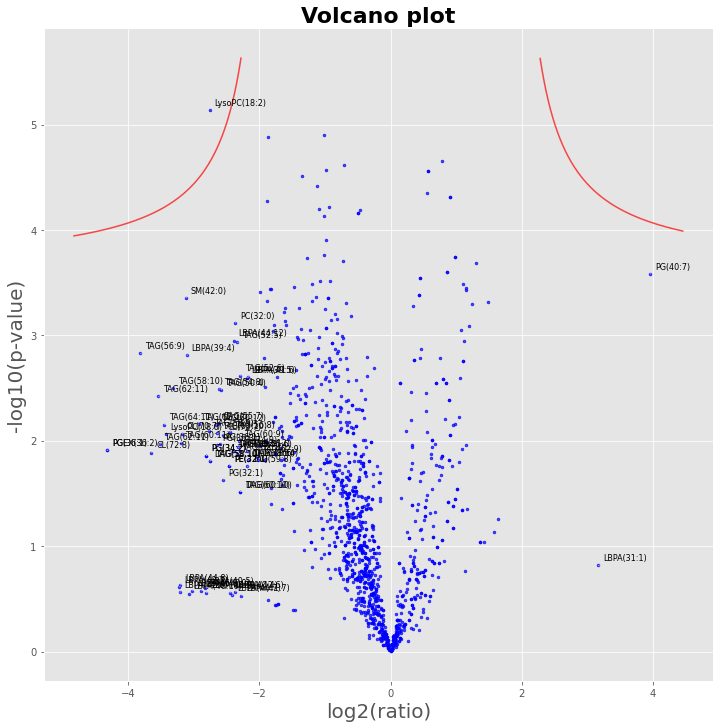

In [17]:
#create the Volcano object

df_pvalue2 = df_pvalue.reset_index()
df_pvalue2 = df_pvalue2.replace(0, np.nan)
df_pvalue2 = df_pvalue2.dropna(how='all', axis=0)

v = Volcano(df_pvalue2["log2_fold_change"], df_pvalue2["minuslog10_pvalue"], df_pvalue2["index"], 
            s_curve_x_axis_overplot=.5, 
            s_curve_y_axis_overplot=.5)

fig = v.get_fig()
fig.savefig("creb3l1_volcano.png")

In [18]:
#transform the data to log2

df_t.iloc[:,1:] = df_t.iloc[:,1:].transform(lambda x: np.log2(x.astype('float64')))
df_t

#df_t.to_csv('pccl3_creb3l1caVSpcDNA_log2.csv')

/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Class-Lipid,DAG(34:1),DAG(32:2),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),...,HexCer(41:0),HexCer(38:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(36:0),HexCer(34:1)
0,CREB3L1_CA,-10.183803,-10.905334,-10.319798,-9.961512,-11.119791,-10.697835,-10.988579,-11.134869,-13.279799,...,-12.716662,-12.364002,-12.491439,-12.442066,-8.50174,-10.247958,-7.031172,-7.59533,-9.777238,-13.255737
1,CREB3L1_CA,-8.844818,-10.612243,-10.27592,-9.83205,-10.210927,-9.216876,-10.695488,-10.405121,-12.986708,...,-12.642544,-12.070911,-12.196022,-12.178544,-8.213415,-9.614526,-6.520078,-7.293278,-9.484147,-12.962646
2,CREB3L1_CA,-9.618247,-10.955498,-10.157524,-9.864729,-10.449921,-9.549884,-11.038743,-10.41363,-13.329963,...,-12.57675,-12.414166,-12.543933,-12.463254,-8.542549,-9.962918,-6.818933,-7.562651,-9.827402,-13.305901
4,pcDNA,-8.83685,-10.076426,-9.861217,-9.15375,-10.198376,-9.216201,-9.798771,-10.251915,-11.473102,...,-13.350497,-11.306721,-12.216893,-12.218527,-8.696208,-10.154617,-6.575941,-7.595833,-12.616973,-13.133066
5,pcDNA,-8.605358,-9.694418,-9.479209,-8.908605,-9.763515,-8.942437,-9.364164,-10.157474,-10.522739,...,-12.880178,-11.487961,-12.037325,-12.170212,-8.391678,-9.877001,-6.348512,-7.346687,-9.518475,-12.751058
6,pcDNA,-8.570589,-9.49158,-9.276371,-8.855563,-10.107697,-8.856628,-9.187385,-9.989724,-10.576269,...,-12.85972,-12.221875,-12.164968,-12.462757,-8.613058,-10.025958,-6.725683,-7.685309,-10.111315,-12.54822


In [19]:
#calculate z_score

z_scores = df_t.iloc[:,1:].transform(lambda x : zscore(x.astype('float64'),ddof=1))

In [20]:
#merge z_score with Lipid-Class column to create df_final

df_final_pccl3_creb3l1 = pd.concat([df_t.iloc[:,:1], z_scores], axis = 1)

In [21]:
df_final_pccl3_creb3l1.dtypes

Class-Lipid              object
DAG(34:1)               float64
DAG(32:2)               float64
DAG(33:2)               float64
DAG(34:2)               float64
DAG(35:2)               float64
DAG(36:1)               float64
DAG(36:3)               float64
DAG(37:1)               float64
DAG(36:4)               float64
DAG(37:2)               float64
DAG(38:2)               float64
DAG(38:3)               float64
DAG(38:4)               float64
DAG(39:1)               float64
DAG(38:6)               float64
DAG(40:2)               float64
DAG(40:6)               float64
DAG(41:1)               float64
DAG(41:2)               float64
DAG(42:1)               float64
DAG(42:2)               float64
DAG(43:1)               float64
DAG(44:1)               float64
DAG(44:2)               float64
DAG(43:2)               float64
DAG(32:3)               float64
DAG(31:3)               float64
DAG(32:1)               float64
DAG(26:3)               float64
DAG(29:1)               float64
DAG(29:3

In [ ]:
#save to csv
df_final_pccl3_creb3l1.to_csv('pccl3_creb3l1.csv')

## Clustermap and Heatmap

In [22]:
#Clustermap 

df2 = df_final_pccl3_creb3l1.copy()
df2 = df2.set_index('Class-Lipid', drop = True)


#Clustermap

ax = sns.clustermap(df2,
                    #z_score = 1,
                    #cmap="vlag",
                    #center=0, 
                    #vmin = -1,
                    #vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

#plt.title('Cluster map', fontsize = 60) # title with fontsize 20
#plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
#plt.ylabel('Z - Score', fontsize =80) # y-axis label with fontsize 15

#ax.savefig("databeforecombat.png")

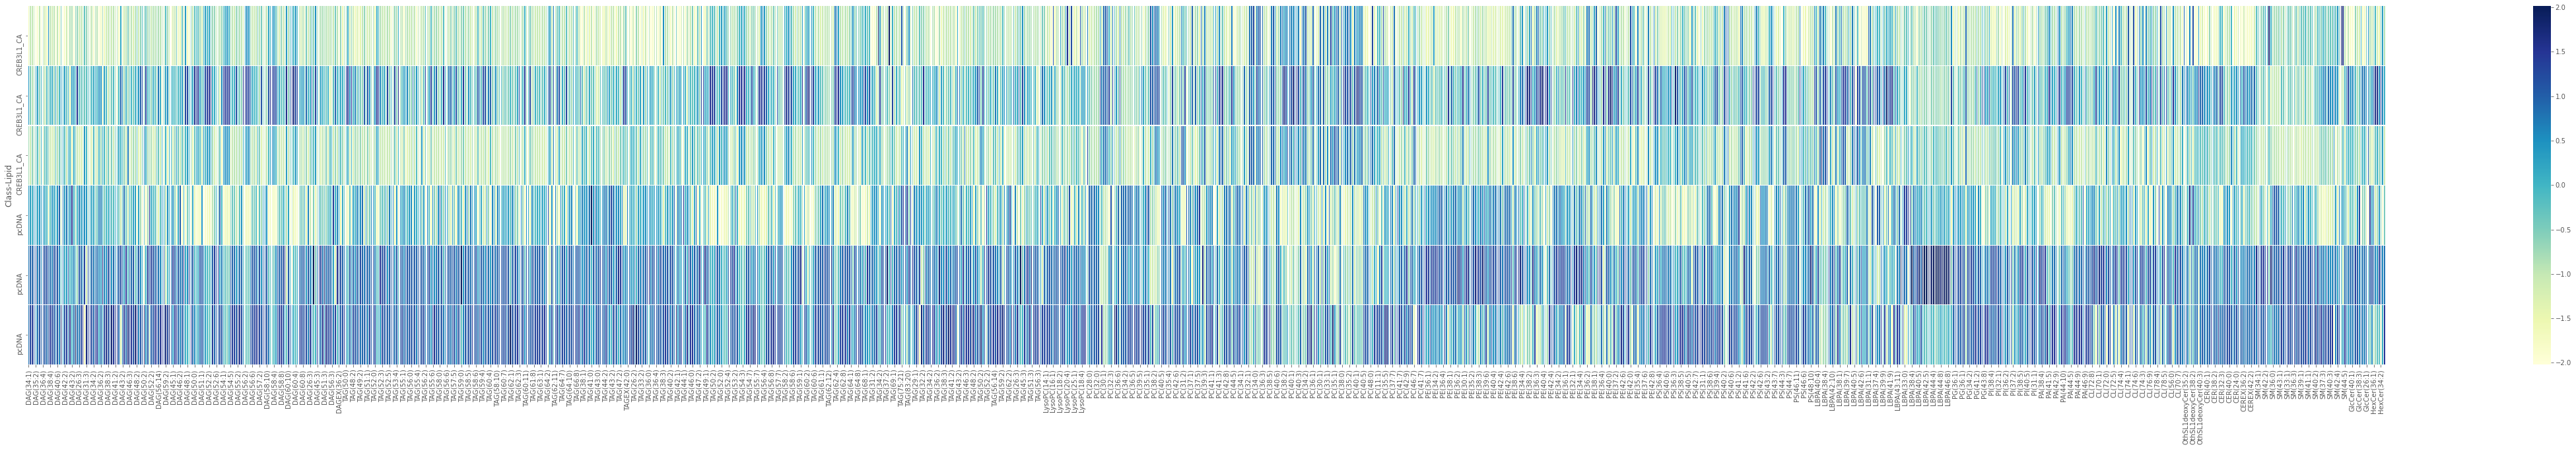

In [25]:
#Regular Heatmap

fig, ax = plt.subplots(figsize=(80,10))
ax = sns.heatmap(df2,
                 linewidth = .1,
                 #vmin=-3,
                 #vmax=3,
                 cmap="YlGnBu")
fig.savefig("pccl3_creb3l1CAVSpcDNA.png")

In [ ]:
#Correlation Clustermap

from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = df2.corr()
correlations_array = np.asarray(df2.corr())

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(100, 100))

In [ ]:
res = sns.clustermap(df2, standard_scale=0, figsize=(100,100), linewidth = .2)
#res.savefig("pccl3_creb3l1CAVSpcDNA_clustermap.png")

In [ ]:
def extract_clustered_table(res, data):
    """
    input
    =====
    res:     <sns.matrix.ClusterGrid>  the clustermap object
    data:    <pd.DataFrame>            input table
    
    output
    ======
    returns: <pd.DataFrame>            reordered input table
    """
    
    # if sns.clustermap is run with row_cluster=False:
    if res.dendrogram_row is None:
        print("Apparently, rows were not clustered.")
        return -1
    
    if res.dendrogram_col is not None:
        # reordering index and columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]
        new_ind = data.index[res.dendrogram_row.reordered_ind]
        
        return data.loc[new_ind, new_cols]
    
    else:
        # reordering the index
        new_ind = data.index[res.dendrogram_row.reordered_ind]

        return data.loc[new_ind,:]

In [ ]:
ordered = extract_clustered_table(res, df2)

In [ ]:
df2

In [ ]:
sns.pairplot(df3)

In [ ]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [ ]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [ ]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
# Loading / Saving dataset

data_concat.to_csv('rawdata_allkinases.csv')
#data_concat = pd.read_csv('data_concat.csv')
#data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Normalising the data by Cell Number
data_concat.iloc[:,2:756] = data_concat.iloc[:,2:756].div(data_concat['Cell number'], axis=0)
data_concat = data_concat.drop(['Cell number'], axis=1)

In [ ]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [ ]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [ ]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [ ]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [ ]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [ ]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [ ]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)